# Exploratory Data Analysis (EDA)

Jorge E Betancourt

- Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, helping to understand the structure, patterns, and relationships within the data. Here are some principles and examples to implement EDA techniques in Python. We will be using Kaggle's dataset from: "Titanic, Machine Learning from disaster"

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data set

In [3]:
#Step #1" Load and Inspect data

#path=r"C:\Users\jebet\OneDrive\ConsultoriaServcoopLLC\SkillUp\StatisticsForDataScience\Train.csv"

# Load dataset
#df = pd.read_csv(path)

# Display first few rows
#print(df.head(20))
#df.head(20)

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
path='/content/drive/My Drive/Exercises/train.csv'
df=pd.read_csv(path)
df.head(200)
#df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [5]:
# Display data types
#print(df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Function to extract the title
def extract_title(name):
    match = re.search(r',\s*(\w+)\.', name)
    if match:
        return match.group(1)
    return None


In [7]:
# Apply the function to create a new column
df['Title'] = df['Name'].apply(extract_title)

#Drop column passenger ID
df=df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])



In [8]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
5,0,3,male,NaN,0,0,8.4583,Q,Mr
6,0,1,male,54.0,0,0,51.8625,S,Mr
7,0,3,male,2.0,3,1,21.0750,S,Master
8,1,3,female,27.0,0,2,11.1333,S,Mrs
9,1,2,female,14.0,1,0,30.0708,C,Mrs


In [9]:
#Handling Missing Values
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         1
dtype: int64


In [10]:

# Fill missing Age with median

df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode

modeEmb=df['Embarked'].mode()[0]
print(modeEmb)
df['Embarked']=df['Embarked'].fillna(modeEmb)

#Fill missing Title with mode
modeTitle=df['Title'].mode()[0]
print(modeTitle)
df['Title']=df['Title'].fillna(modeTitle)


print(df.isnull().sum())

S
Mr
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


## Summary Statistics
### Step 2: Univariate Analysis:

In [11]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object', 'category']))

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
         Sex Embarked Title
count    891      891   891
unique     2        3    16
top     male        S    Mr
freq     577      646   518


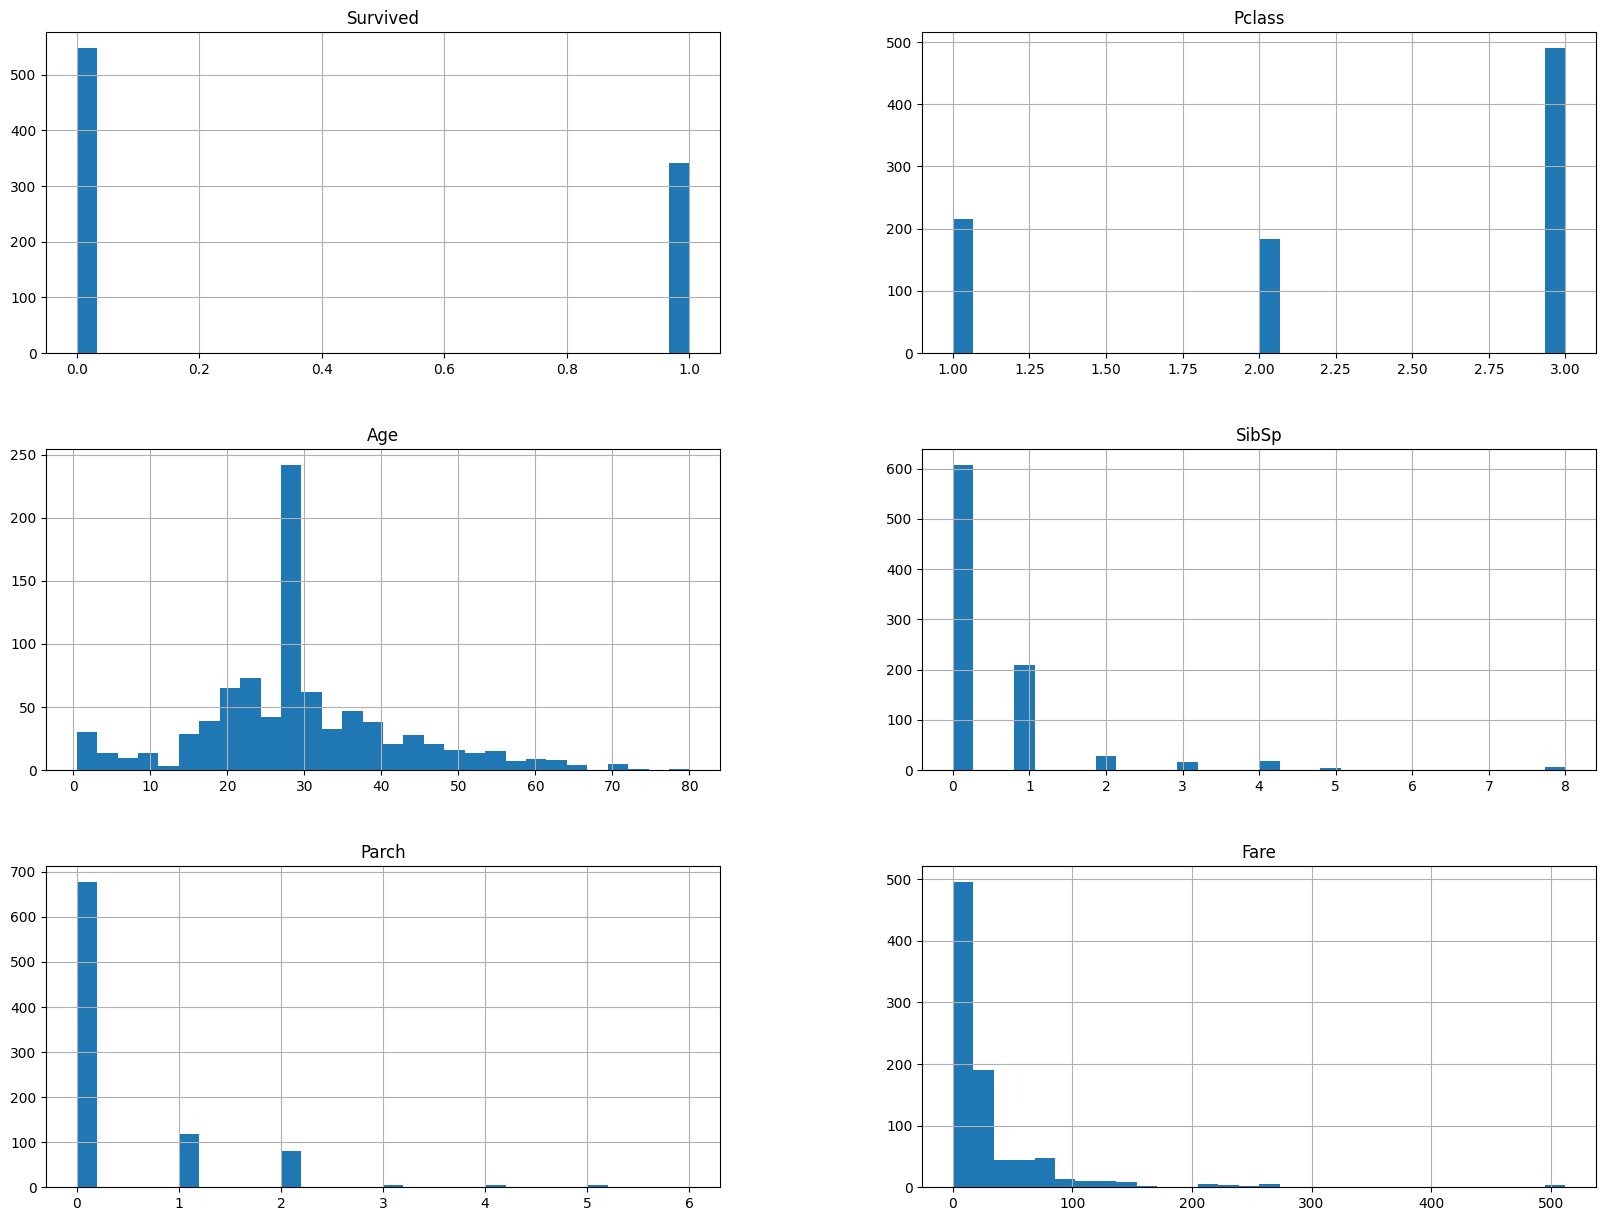

In [12]:
# Histograms for numerical variables
df.hist(bins=30, figsize=(20, 15))
plt.show()

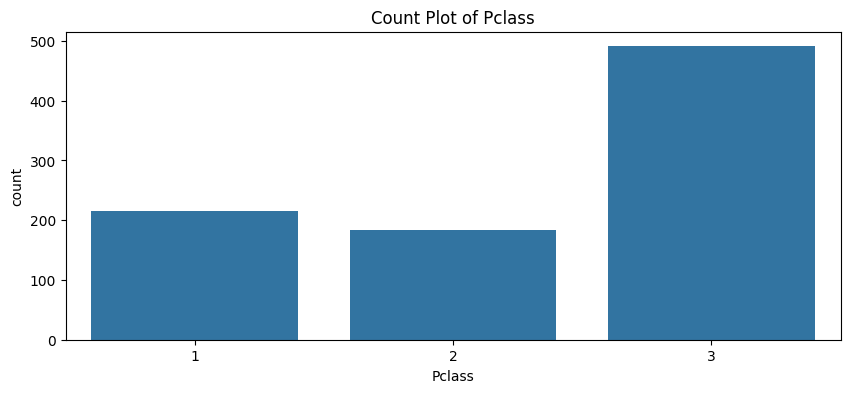

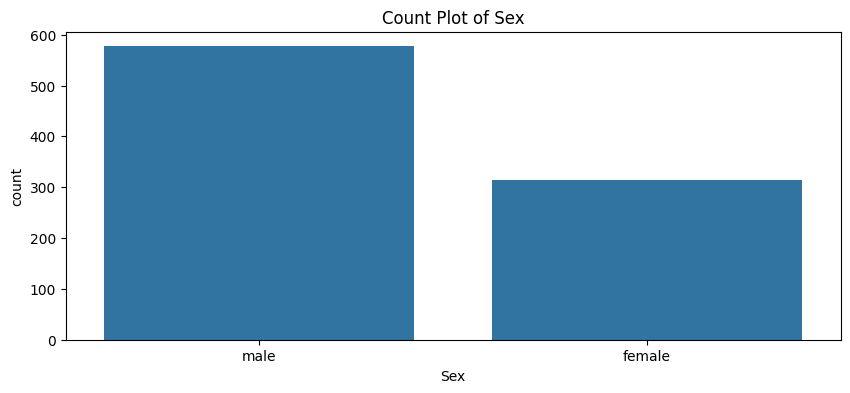

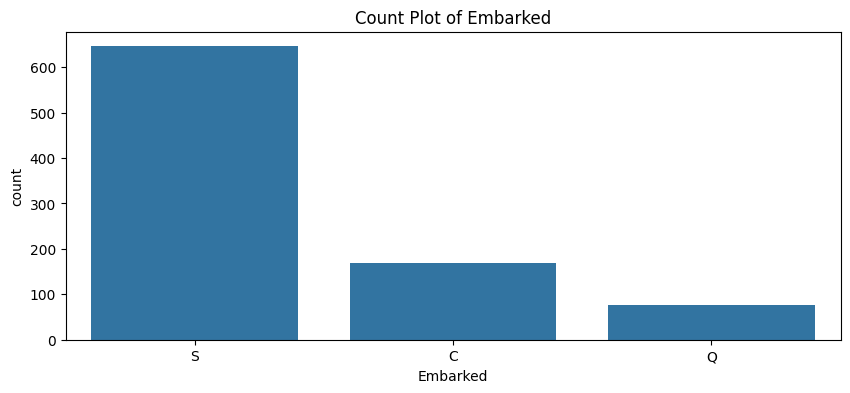

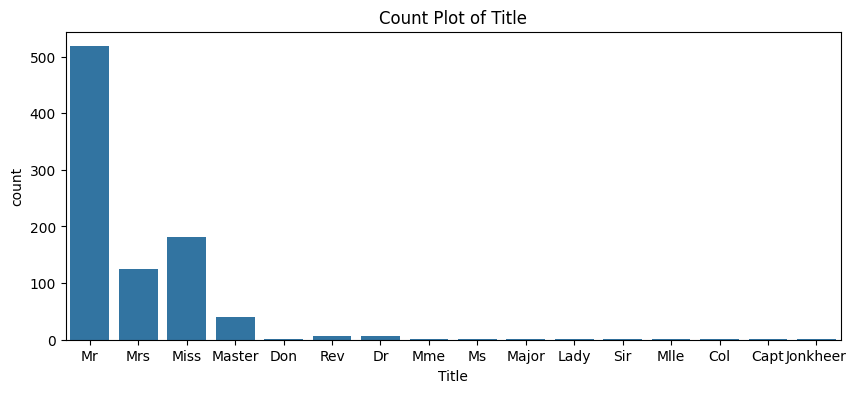

In [13]:
# Count plots for categorical variables
categorical_vars = ['Pclass', 'Sex', 'Embarked', 'Title']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.show()

### Step 3: Bivariate Analysis:


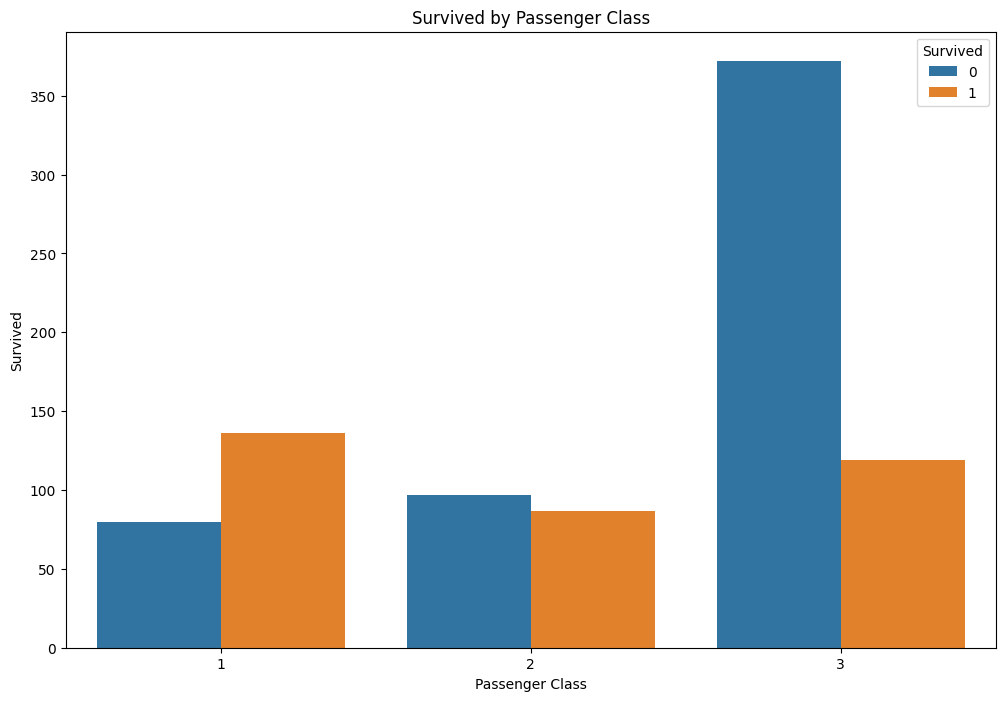

In [14]:
# Step 3: Bivariate Analysis
# Survived by Pclass
#sns.barplot(x='Pclass', y='Survived', data=df)
#plt.title('Survived by Pclass')
#plt.show()

# Create a box plot for Survived by Pclass
plt.figure(figsize=(12, 8))
sns.countplot(x='Pclass', hue='Survived', data=df)

# Add title and labels
plt.title('Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')

# Show the plot
plt.show()

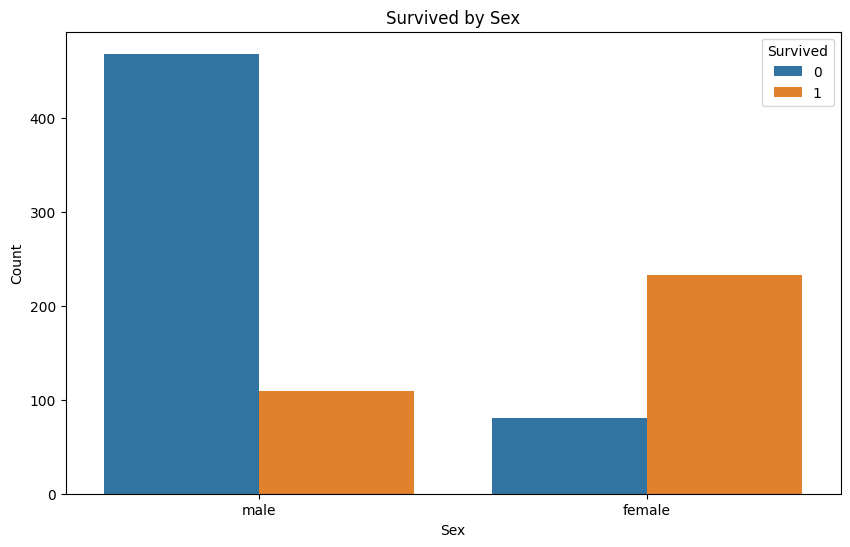

In [15]:
# Survived by Sex

# Create a count plot for Survived by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


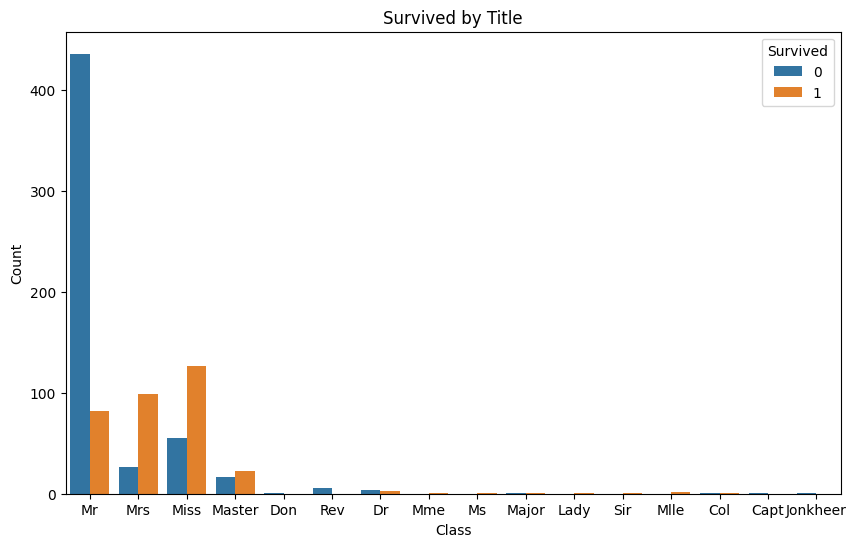

In [16]:
# Handle missing values in 'Title'

df.fillna({'Title':'Unknown'}, inplace=True)

# Create a count plot for Survived by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survived by Title')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

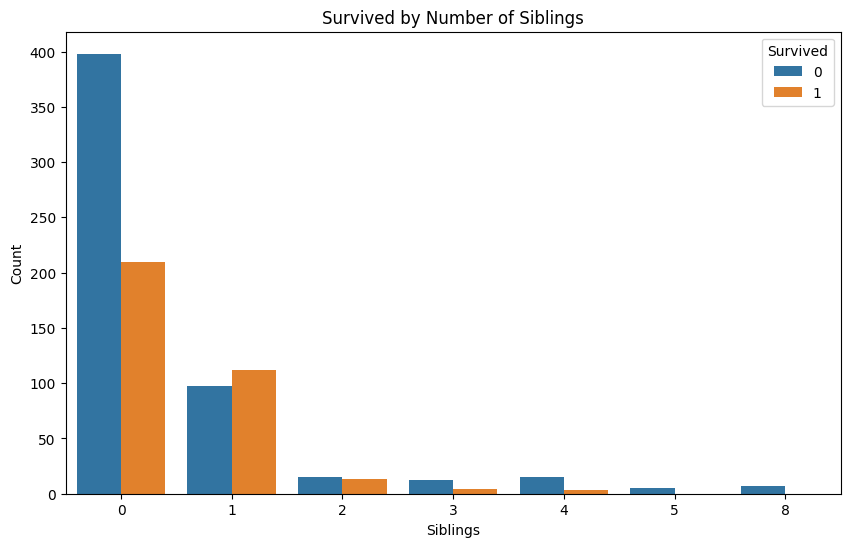

In [17]:
# Handle missing values in 'SibSp'

df.fillna({'SibSp':'Unknown'}, inplace=True)

# Create a count plot for Survived by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survived by Number of Siblings')
plt.xlabel('Siblings')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Fare bin edges:
(-0.001, 7.55]
(7.55, 7.854]
(7.854, 8.05]
(8.05, 10.5]
(10.5, 14.454]
(14.454, 21.679]
(21.679, 27.0]
(27.0, 39.688]
(39.688, 77.958]
(77.958, 512.329]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-0.001, 7.55]'),
  Text(1, 0, '(7.55, 7.854]'),
  Text(2, 0, '(7.854, 8.05]'),
  Text(3, 0, '(8.05, 10.5]'),
  Text(4, 0, '(10.5, 14.454]'),
  Text(5, 0, '(14.454, 21.679]'),
  Text(6, 0, '(21.679, 27.0]'),
  Text(7, 0, '(27.0, 39.688]'),
  Text(8, 0, '(39.688, 77.958]'),
  Text(9, 0, '(77.958, 512.329]')])

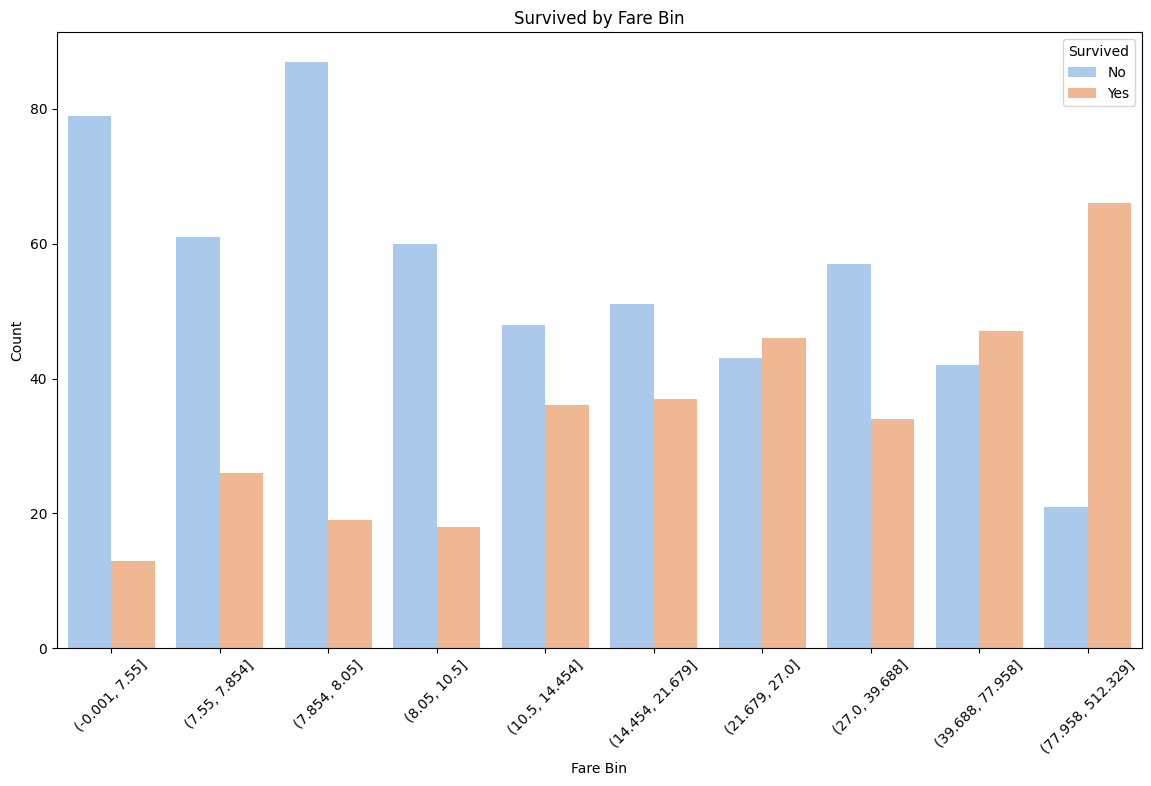

In [18]:


fare_bins = pd.qcut(df['Fare'], 10)
df['FareBin'] = fare_bins
#print(df.head(20))
# Display the bin edges
bin_edges = fare_bins.cat.categories
print("Fare bin edges:")
for edge in bin_edges:
    print(edge)
# Create a count plot for Survived by FareBin and Sex
plt.figure(figsize=(14, 8))
count_plot = sns.countplot(x='FareBin',hue='Survived', data=df, palette="pastel")
plt.title('Survived by Fare Bin')
plt.xlabel('Fare Bin')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)


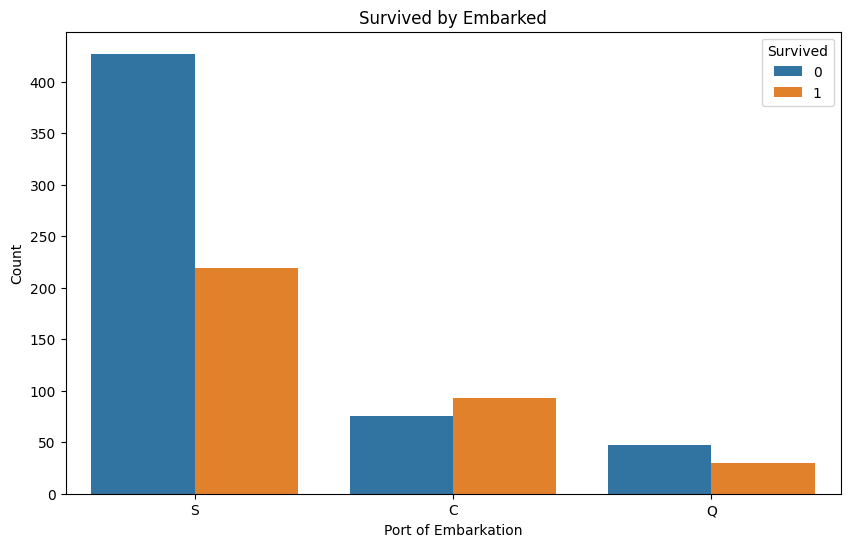

In [19]:
# Handle missing values in 'Embarked'


df.fillna({'Embarked':'Unknown'}, inplace=True)

# Create a count plot for Survived by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survived by Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

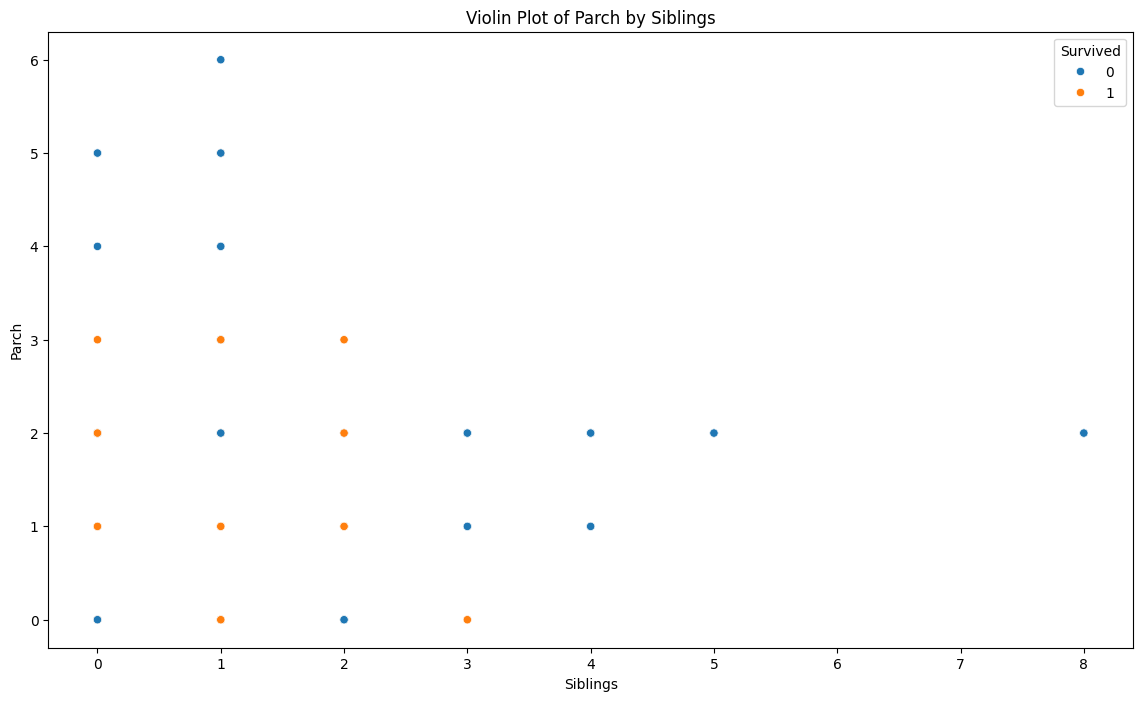

In [20]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=df)
plt.title('Violin Plot of Parch by Siblings')
plt.xlabel('Siblings')
plt.ylabel('Parch')
plt.show()

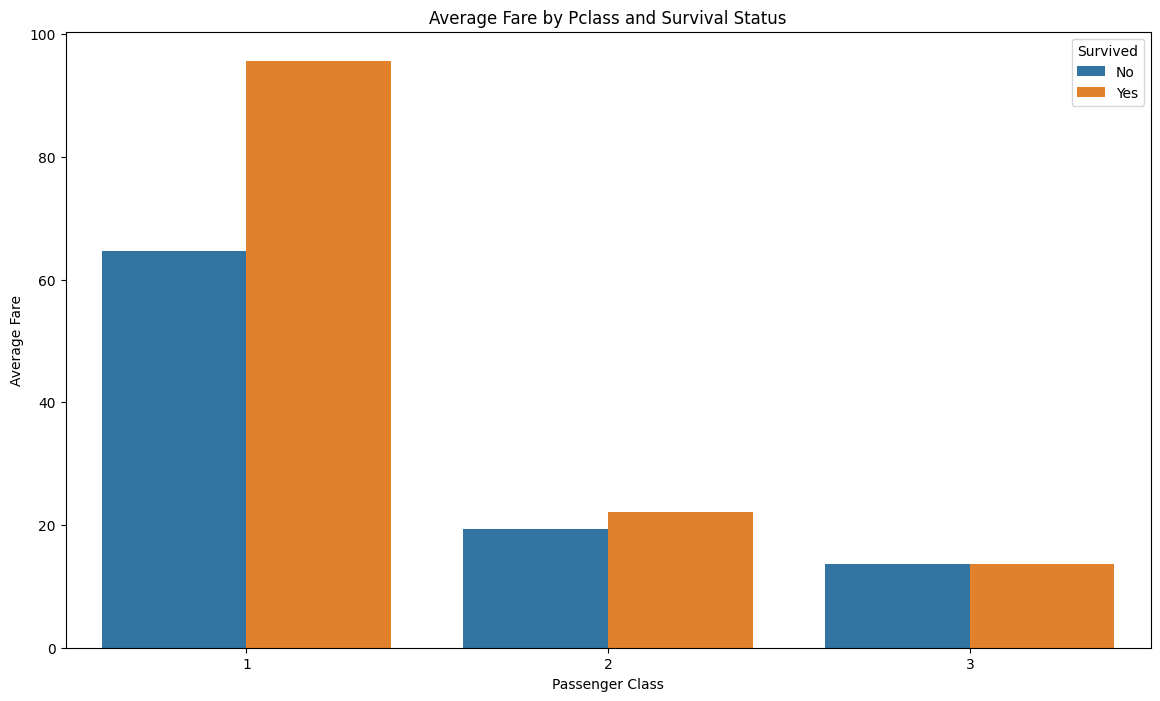

In [21]:
# Create a bar plot for Survived by Pclass
plt.figure(figsize=(14, 8))
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df, errorbar=None)
plt.title('Average Fare by Pclass and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



<Figure size 1400x800 with 0 Axes>

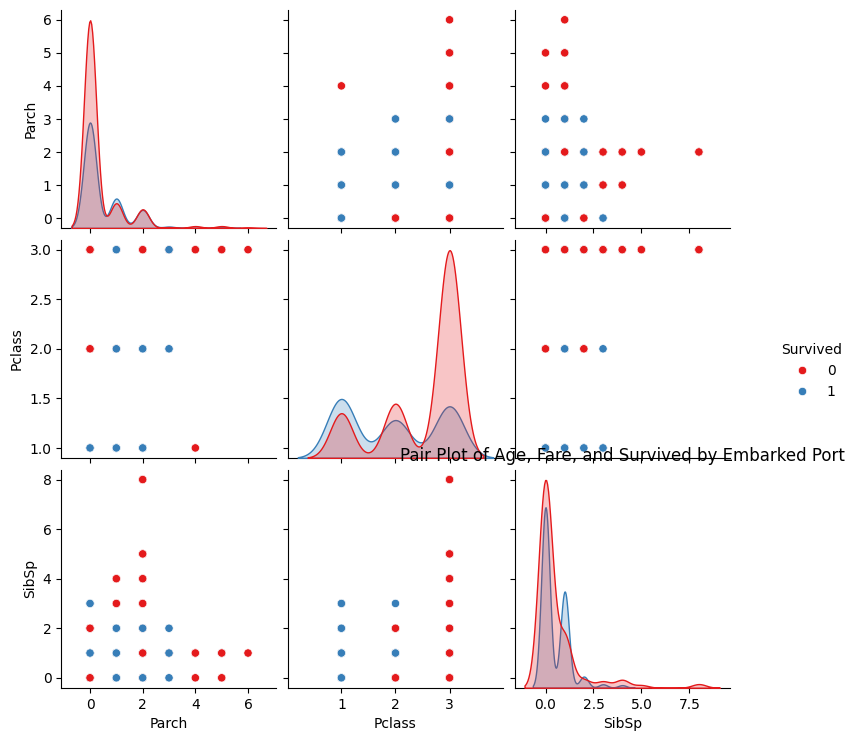

In [22]:
plt.figure(figsize=(14, 8))
sns.pairplot(df, hue='Survived', vars=['Parch', 'Pclass', 'SibSp'], palette='Set1')
plt.title('Pair Plot of Age, Fare, and Survived by Embarked Port')
plt.show()

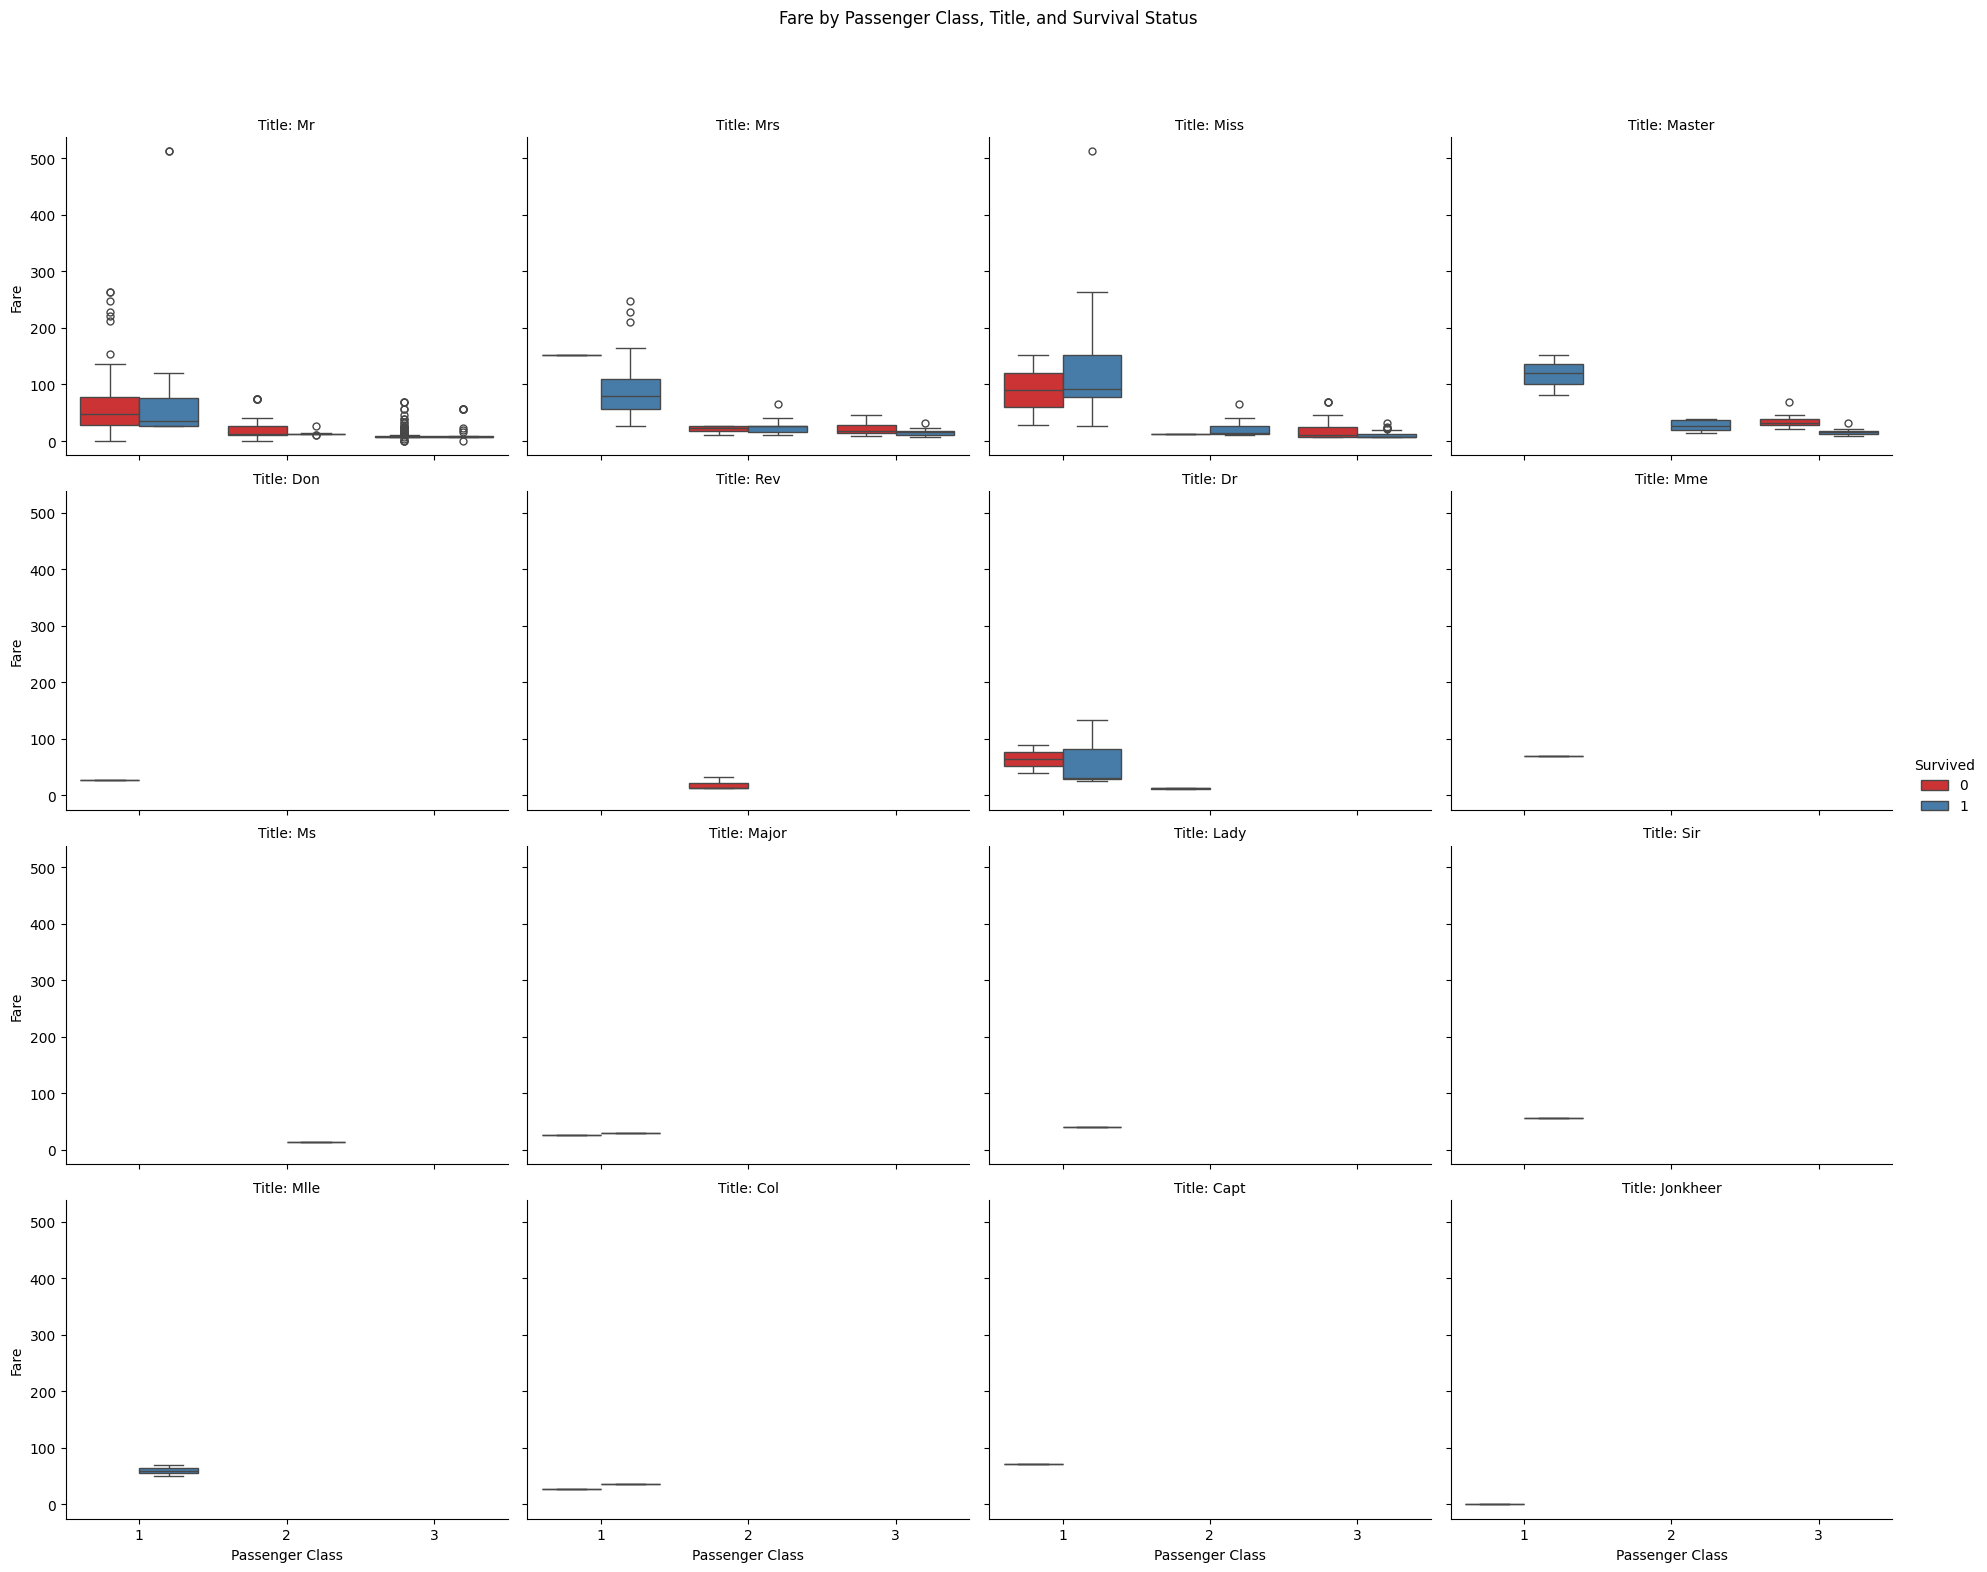

In [23]:

# Create a Catplot for Title and Survived by Pclass
g = sns.catplot(
    x='Pclass',
    y='Fare',
    hue='Survived',
    col='Title',
    data=df,
    kind='box',
    col_wrap=4,
    height=4,
    aspect=1.2,
    palette='Set1'
)

# Add axis labels and title
g.set_axis_labels("Passenger Class", "Fare")
g.set_titles("Title: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fare by Passenger Class, Title, and Survival Status')
plt.show()

In [24]:
pivot_table = pd.pivot_table(df, index='Title', columns=['Survived', 'Pclass'], aggfunc='size', fill_value=0)
print(pivot_table)
pivot_table

Survived   0            1        
Pclass     1   2    3   1   2   3
Title                            
Capt       1   0    0   0   0   0
Col        1   0    0   1   0   0
Don        1   0    0   0   0   0
Dr         2   2    0   3   0   0
Jonkheer   1   0    0   0   0   0
Lady       0   0    0   1   0   0
Major      1   0    0   1   0   0
Master     0   0   17   3   9  11
Miss       2   2   51  44  32  51
Mlle       0   0    0   2   0   0
Mme        0   0    0   1   0   0
Mr        70  83  283  38   8  36
Mrs        1   4   21  41  37  21
Ms         0   0    0   0   1   0
Rev        0   6    0   0   0   0
Sir        0   0    0   1   0   0


Survived   0            1        
Pclass     1   2    3   1   2   3
Title                            
Capt       1   0    0   0   0   0
Col        1   0    0   1   0   0
Don        1   0    0   0   0   0
Dr         2   2    0   3   0   0
Jonkheer   1   0    0   0   0   0
Lady       0   0    0   1   0   0
Major      1   0    0   1   0   0
Master     0   0   17   3   9  11
Miss       2   2   51  44  32  51
Mlle       0   0    0   2   0   0
Mme        0   0    0   1   0   0
Mr        70  83  283  38   8  36
Mrs        1   4   21  41  37  21
Ms         0   0    0   0   1   0
Rev        0   6    0   0   0   0
Sir        0   0    0   1   0   0

In [1]:
G = nx.Graph()

# Add nodes for each unique value
titles = df['Title'].unique()
survived = df['Survived'].unique()
pclasses = df['Pclass'].unique()

G.add_nodes_from(titles, category='Title')
G.add_nodes_from(survived, category='Survived')
G.add_nodes_from(pclasses, category='Pclass')

# Add edges based on the pivot table
for title in titles:
    for surv in survived:
        for pclass in pclasses:
            if (surv, pclass) in pivot_table.columns:
                count = pivot_table.at[title, (surv, pclass)]
                if count > 0:
                    G.add_edge(title, surv, weight=count)
                    G.add_edge(surv, pclass, weight=count)

In [ ]:
pos = nx.spring_layout(G, seed=42, k=1)  # Position nodes using the spring layout
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on category
title_nodes = [n for n, attr in G.nodes(data=True) if attr['category'] == 'Title']
survived_nodes = [n for n, attr in G.nodes(data=True) if attr['category'] == 'Survived']
pclass_nodes = [n for n, attr in G.nodes(data=True) if attr['category'] == 'Pclass']

nx.draw_networkx_nodes(G, pos, nodelist=title_nodes, node_color='red', label='Title', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=survived_nodes, node_color='blue', label='Survived', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=pclass_nodes, node_color='green', label='Pclass', node_size=500)

# Draw edges with weights
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.9)
nx.draw_networkx_labels(G, pos)

plt.legend(scatterpoints=1)
plt.title('Network Graph of Survived and Not Survived by Pclass and Title')
plt.show()


## Step 4: Multivariate Analysis



In [ ]:
# Pair plot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']])
plt.show()

In [26]:
#Decode all categorical into one hot encoded
# One-hot encode categorical variables
#df.info()
# Encode categorical variables


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked', 'Pclass', 'Title'], drop_first=False)


#transform boolean values to integers (1, 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

#Remove FareBin
df=df.drop(columns=['FareBin'])

df.head(20)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,28.0,0,0,8.4583,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,54.0,0,0,51.8625,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
7,0,0,2.0,3,1,21.0750,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8,1,1,27.0,0,2,11.1333,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,1,1,14.0,1,0,30.0708,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


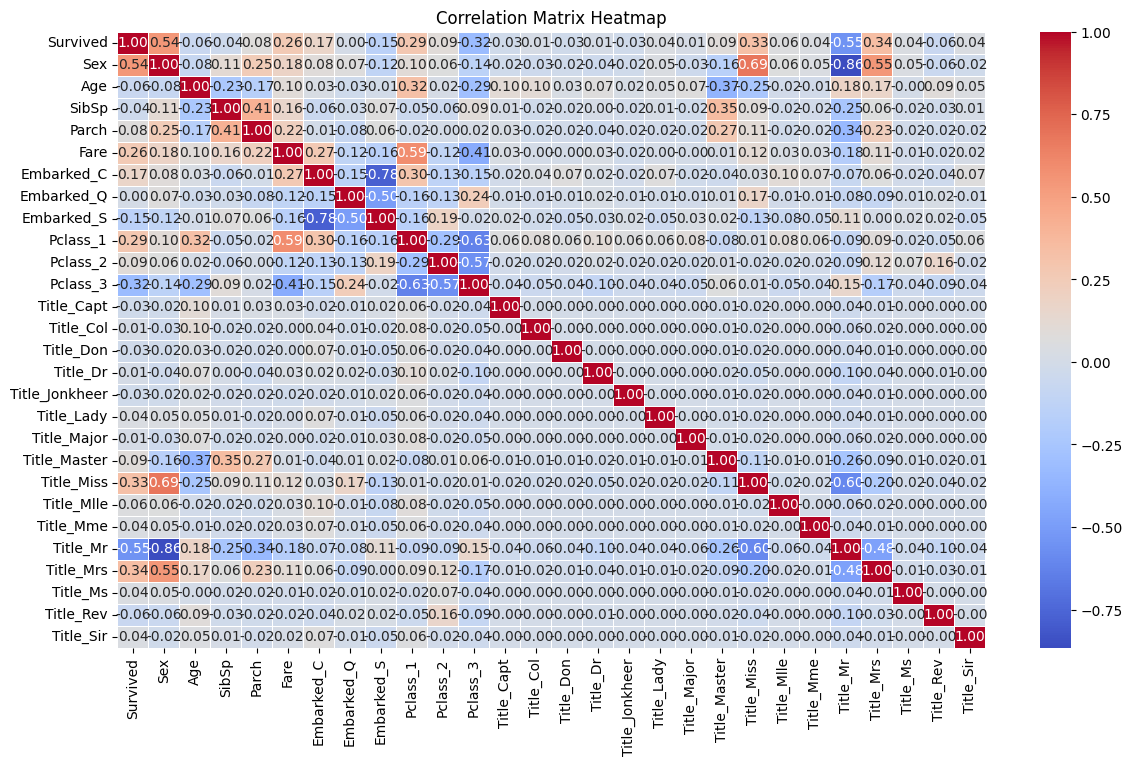

In [27]:
#Build a correlation matrix with all the factors
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



## Determine Significant variables through regression analysis

In [28]:
#Perform regression to identify relevant variables
#import sys
#sys.path.append(r'c:\users\jebet\anaconda3\lib\site-packages')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
#print(sm.__version__)
#import scipy
#!pip show pandas

In [30]:
# Prepare the features and target variable

y = df['Survived']
df.drop(columns=['Survived'], inplace=True)
df.head(10)
X=df
X.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,28.0,0,0,8.4583,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,54.0,0,0,51.8625,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,2.0,3,1,21.0750,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,27.0,0,2,11.1333,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,14.0,1,0,30.0708,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create and fit the linear regression model
# Add a constant term to the predictor
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Predict the target variable for the test set
y_pred = ols_model.predict(X_test_sm)

In [44]:
# Print the detailed summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     25.86
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           5.88e-73
Time:                        18:22:20   Log-Likelihood:                -287.65
No. Observations:                 712   AIC:                             619.3
Df Residuals:                     690   BIC:                             719.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2085      0.110      1.